# Hyperparameter Optimization
Evan Komp
DSMCER Guest Lecture 03.03.22
***

### Run below if using this notebook for the first time
*Make sure you have the proper environment activate!*

In [2]:
!conda install -c conda-forge numpy scikit-learn optuna seaborn matplotlib -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/anaconda3/envs/kerastutorial

  added / updated specs:
    - matplotlib
    - numpy
    - optuna
    - scikit-learn
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    alembic-1.7.6              |     pyhd8ed1ab_0         136 KB  conda-forge
    autopage-0.5.0             |     pyhd8ed1ab_0          26 KB  conda-forge
    certifi-2021.5.30          |   py36h79c6626_0         141 KB  conda-forge
    cliff-3.10.1               |     pyhd8ed1ab_0          53 KB  conda-forge
    cmaes-0.8.2                |     pyh44b312d_0          16 KB  conda-forge
    cmd2-2.2.0                 |   py36h79c6626_0         194 KB  conda-for

***
### Imports

In [3]:
# data handling
import numpy as np
import sklearn.datasets

# metrics
import sklearn.metrics

#plotting
import matplotlib.pyplot as plt

# hyperparameter optimization
import optuna
import sklearn.model_selection
import sklearn.preprocessing

***
### Why optimize hyperparameters?

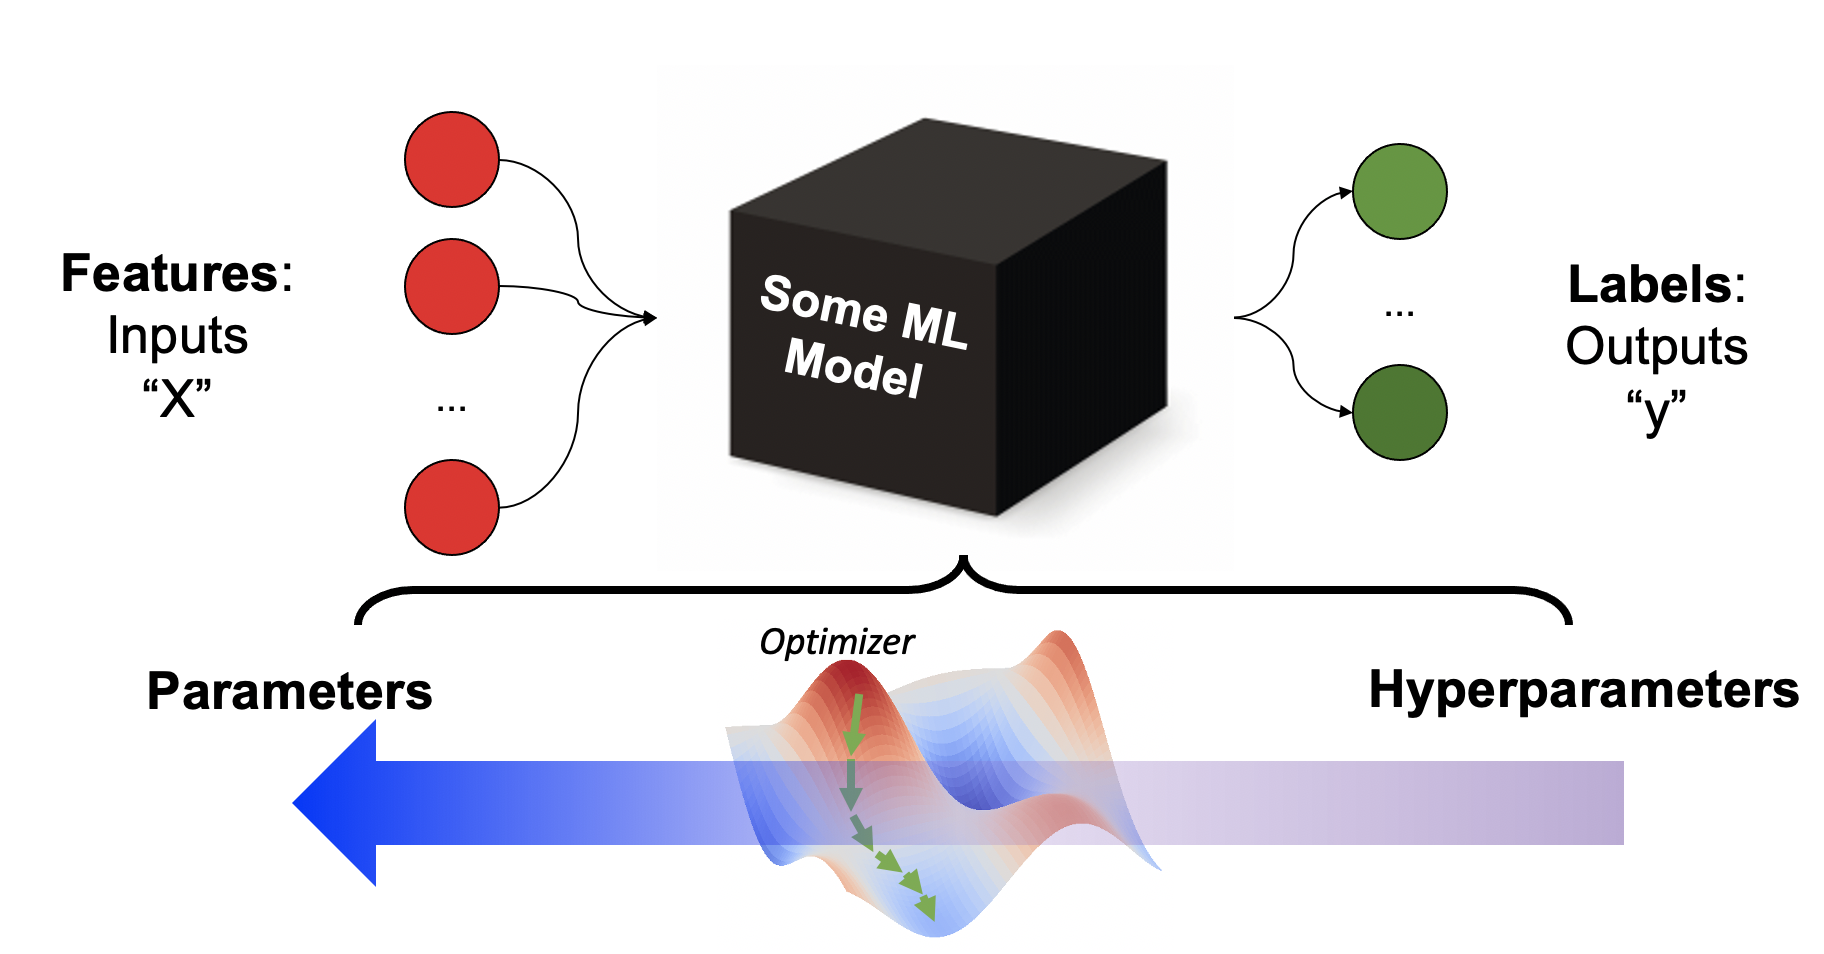

In math, we are trying to create a predictor

$$\hat{y} = f(X;\theta,\Omega)$$

for parameters $\theta$ and hyperparamers $\Omega$, such that

$$metric(y,\hat{y})$$

Is optimized.

Now let's say we have some hyperparameters 